### lam data crew
#### Mode Evaluation with Cross Validation

From the data cleaned, transformed and feature engineeringed, load dataset the data from Big Query for model evaluation.

In [12]:
%load_ext google.cloud.bigquery
 

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [13]:
%%bigquery prepared_dataset
select * from `lamdatacrew_clean_data.data_fe_loan_default`;

In [3]:
prepared_dataset.head()

,amount,duration,payments,status,avg_balance_3M_befroe_loan,avg_balance_1M_befroe_loan,trans_freq,min_balance_befroe_loan,avg_amount_trans_before_loan,avg_balance_before_loan,...,balance_POJISTNE,balance_SANKC_UROK,balance_SIPO,balance_SLUZBY,balance_UROK,balance_UVER,balance_k_symbol_missing,years_of_loan,years_of_account,years_card_issued
0,38148,12,3179.0,0,41406.252632,36175.655556,29,900.0,8369.555172,37462.093103,...,3203.531034,0.0,853.648276,1232.855172,11959.148276,0.0,20212.910345,6,6,0
1,24516,12,2043.0,0,69396.845161,63994.557143,73,200.0,16201.558904,55582.226027,...,0.000000,0.0,0.000000,5497.987671,6616.652055,0.0,43467.586301,5,6,0
2,80340,12,6695.0,0,66632.905882,70868.044444,52,1100.0,15464.398077,61531.590385,...,0.000000,0.0,0.000000,5600.276923,11869.140385,0.0,44062.173077,5,6,4
3,87816,12,7318.0,0,23634.031034,24165.537500,84,800.0,4538.900000,25533.214286,...,0.000000,0.0,3750.378571,2678.366667,3852.836905,0.0,15251.632143,5,6,0
4,31248,12,2604.0,0,52298.095122,57986.560000,120,1000.0,13845.458333,64493.099167,...,0.000000,0.0,0.000000,6182.423333,8038.284167,0.0,50272.391667,5,6,0


### SVM Cross validation Hyper-parameters Grid

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import time
from sklearn import metrics
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from datetime import datetime, date, time, timedelta
from sklearn.model_selection import train_test_split
import matplotlib.ticker as mtick
from sklearn.metrics import f1_score
from sklearn import svm
plt.style.use('ggplot')

import os.path
import pickle
import re
import sys
from sklearn import cross_validation

from sklearn.grid_search import GridSearchCV
from sklearn import svm

In [ ]:
X = prepared_dataset.loc[:, prepared_dataset.columns != "status"]
y = prepared_dataset.loc[:, "status"]
np.random.seed(201909) #Set seed for reproducibility benefits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
models = {}   
bestModelsFile = "bestModels_SVM_CV" + ".pickle"
#"""******** Clasificación***************************************************"""
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
# Amplio rango de valores de el parametro de regularización C de SVCs
Cstep1 = np.arange(0.001,0.01,0.004)
Cstep2 = np.arange(0.01,0.1,0.04)
Cstep3 = np.arange(0.1,1.01,0.4)
Cs = np.concatenate((Cstep1, Cstep2, Cstep3), axis=0)
hyperParams = {'C': Cs}
mCV_linear = GridSearchCV(svm.SVC(kernel='linear'), hyperParams, cv=10, scoring='f1')
mCV_linear.fit(X_train, y_train)
mCV_rbf = GridSearchCV(svm.SVC(kernel='rbf', gamma=0.7), hyperParams, cv=10, scoring='f1')
mCV_rbf.fit(X_train, y_train)
mCV_poly = GridSearchCV(svm.SVC(kernel='poly', degree=3), hyperParams, cv=10, scoring='f1')
mCV_poly.fit(X_train, y_train)
models["mCV_linear"] = mCV_linear
models["mCV_rbf"] = mCV_rbf
models["mCV_poly"] = mCV_poly
models["y_train"] = y_train
pickle.dump(models, open(bestModelsFile, 'wb'))
print("   Se ha almacenado un archivo binario ", bestModelsFile)
print ("Best hyperparameters svm.SVC(kernel='linear'): ", mCV_linear.best_params_)
print ("Best hyperparameters svm.SVC(kernel='rbf', gamma=0.7): ", mCV_rbf.best_params_)
print ("Best hyperparameters svm.SVC(kernel='poly',degree=3): ", mCV_poly.best_params_)

/opt/conda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classifi

In [ ]:
print("ready")

In [17]:
print("ready2")

ready2


In [18]:
hyperParams

{'C': array([0.001, 0.005, 0.009, 0.01 , 0.05 , 0.09 , 0.1  , 0.5  , 0.9  ])}

In [19]:
models

{'mCV_linear': GridSearchCV(cv=10, error_score='raise',
        estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
        fit_params={}, iid=True, n_jobs=1,
        param_grid={'C': array([0.001, 0.005, 0.009, 0.01 , 0.05 , 0.09 , 0.1  , 0.5  , 0.9  ])},
        pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0),
 'mCV_rbf': GridSearchCV(cv=10, error_score='raise',
        estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
        fit_params={}, iid=True, n_jobs=1,
        param_grid={'C': array([0.001, 0.005, 0.009, 0.01 , 0.05 , 0.09 , 0.1  , 0.5  , 0.9  ])},
        pre_dispatch='2*n_jobs', refit=True,

In [20]:
print("   Se ha almacenado un archivo binario ", bestModelsFile)
print ("Best hyperparameters svm.SVC(kernel='linear'): ", mCV_linear.best_params_)
print ("Best hyperparameters svm.SVC(kernel='rbf', gamma=0.7): ", mCV_rbf.best_params_)
print ("Best hyperparameters svm.SVC(kernel='poly',degree=3): ", mCV_poly.best_params_)

   Se ha almacenado un archivo binario  bestModels_SVM_CV.pickle
Best hyperparameters svm.SVC(kernel='linear'):  {'C': 0.05}
Best hyperparameters svm.SVC(kernel='rbf', gamma=0.7):  {'C': 0.001}
Best hyperparameters svm.SVC(kernel='poly',degree=3):  {'C': 0.001}


In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names = "No Default","Default"
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
def clasificacion(modelo, StrKernel):
    global X_test, y_test
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    print ("************------",StrKernel,"------************")
    y_pred = modelo.predict(X_test)
    print (  "Precisión: ", accuracy_score(y_test, y_pred))
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    print('Matriz de confusión sin normalización')
    print(cm)
    # Normalize the confusion matrix by row (i.e by the number of samples
    # in each class)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    titulo = 'Matriz de confusión normalizada '
    print(titulo)
    print(cm_normalized)
    titulo = titulo + StrKernel
    plt.figure()
    plot_confusion_matrix(cm_normalized, title=titulo)
    plt.show()

************------ SVC linear ------************
Precisión:  0.9121951219512195
Matriz de confusión sin normalización
[[178   4]
 [ 14   9]]
Matriz de confusión normalizada 
[[0.98 0.02]
 [0.61 0.39]]


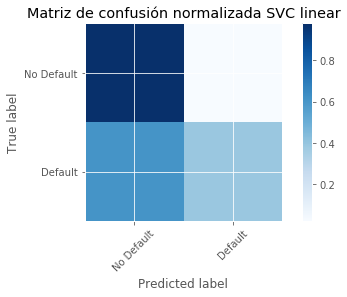

************------ SVC rbf ------************
Precisión:  0.8878048780487805
Matriz de confusión sin normalización
[[182   0]
 [ 23   0]]
Matriz de confusión normalizada 
[[1. 0.]
 [1. 0.]]


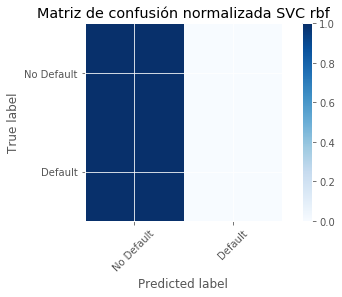

************------ SVC poly ------************
Precisión:  0.8878048780487805
Matriz de confusión sin normalización
[[173   9]
 [ 14   9]]
Matriz de confusión normalizada 
[[0.95 0.05]
 [0.61 0.39]]


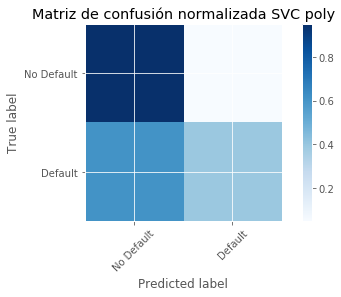

In [24]:
clasificacion(mCV_linear, StrKernel = 'SVC linear')
clasificacion(mCV_rbf, StrKernel = 'SVC rbf')
clasificacion(mCV_poly, StrKernel = 'SVC poly')